In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from matplotlib import dates

pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"

In [66]:
# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [36]:
# 보기 옵션
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [49]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total3.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

In [50]:
df['year'] = df['reg_date'].dt.year
df['month'] = df['reg_date'].dt.month
df['week'] = df['reg_date'].dt.week

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2765/1599429842.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['reg_date'].dt.week


# 데이터 분포

In [51]:
df['prd'].value_counts()

고추      388681
버섯      295218
오이      242301
토마토     205550
호박      198434
         ...  
옥돔           1
피마자          1
자리돔          1
상황버섯         1
가재           1
Name: prd, Length: 328, dtype: int64

In [52]:
df.describe()

,class,scale,price,price_kg,year,month,week
count,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000
mean,1.82487,61.35309,137587.94783,3536.71542,2020.27419,7.07274,28.89063
std,1.85840,1433.65485,988615.41355,8202.81625,1.33979,3.21946,14.09216
min,1.00000,0.01000,500.00000,0.08000,2018.00000,1.00000,1.00000
25%,1.00000,6.00000,12000.00000,1250.00000,2019.00000,4.00000,17.00000
50%,1.00000,15.00000,31800.00000,2265.00000,2020.00000,7.00000,30.00000
75%,2.00000,40.00000,94000.00000,4062.50000,2021.00000,10.00000,41.00000
max,9.00000,465138.00000,247011400.00000,7757360.00000,2022.00000,12.00000,53.00000


# 품목별 가격 분포

## 함수 생성

In [79]:
# 거래량, 거래 가격, 평균 kg 당 가격, 판매 등급
def prd_info(prd,nums1,nums2):
        # matplotlib 폰트설정
    plt.rc('font', family='AppleGothic') # For MacOS
    # plt.rc('font', family='NanumGothic') # For Windows
    print(plt.rcParams['font.family'])

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.

    plt.rcParams['axes.unicode_minus'] = False

    a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
    b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','class','price_kg']]
    c = a.merge(b)
    c = c.rename(columns= {'scale':'total_scale','price':'total_price','class':'avg_class','price_kg':'avg_price_kg'})

    plt.figure(figsize=(24,18),facecolor="white")
    plt.subplot(4,1,1)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래량 (kg) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_scale'])
    plt.fill_between(c['reg_date'],c['total_scale'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['total_scale'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))


    plt.subplot(4,1,2)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래 가격(원) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_price'])
    plt.fill_between(c['reg_date'],c['total_price'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['total_price'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.subplot(4,1,3)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 kg 당 가격 (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
    plt.fill_between(c['reg_date'],c['avg_price_kg'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['avg_price_kg'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.subplot(4,1,4)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 판매 등급 (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['avg_class'])
    plt.fill_between(c['reg_date'],c['avg_class'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(1,max(c['avg_class'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.show()

## 비교를 위한 품목 선정
- 가장 거래량이 많은 단일 품목 5개
- 김장철 핵심 재료 5개

In [54]:
# 거래량 조회
df.groupby('prd').sum().sort_values('scale',ascending=False).head(10)

,class,scale,price,price_kg,year,month,week
prd,,,,,,,
무,99255,92702512.70000,54261901149,90520034.91000,147891856,548579,2251837
오이,463595,21247819.56000,36025052855,361643024.83000,489512653,1700471,6943280
버섯,581884,15612918.03000,90824246581,1164741224.41000,596416494,2040531,8314234
고추,630079,14073938.38000,50882763437,1285274833.93000,785215150,2916330,11962870
호박,414157,9647542.75000,14637006048,258127989.40000,400887186,1486076,6094532
참외,77379,7357757.50000,21435678288,59167541.17000,47558079,135645,545947
감자,234490,7240928.54000,7950278352,83269987.32000,181863722,606927,2475582
사과,129715,6891691.07000,17652779680,206033199.09000,169304369,634257,2608521
복숭아,252657,6236733.80000,17947112650,396792517.77000,245183727,918519,3765022


- 과채류는 기타 과일, 채소류이므로 제외
- 버섯도 품목 종류가 다양하므로 제외
- 김장 품목들은 따로 작성
- TOP 5 항목
  - 오이,고추,호박,참외,감자
- 김장 품목
  - 마늘,무,배추,열무,쪽파,총각무

## 탐색

### 이상치 제거

In [58]:
# 분포 함수 선언
def dist(df,prd,column):
    display('information')
    display(df[df['prd']==prd][column].describe())
    sns.set_theme(style='whitegrid')
    plt.ticklabel_format(style='plain', axis='y')
    ax = sns.violinplot(y=df[df['prd']==prd][column],fmt='g')

In [123]:
prd = '무'

'information'

count     73208.00000
mean       1236.47736
std        5347.21930
min           0.40000
25%         395.00000
50%         706.25000
75%        1250.00000
max     1112058.75000
Name: price_kg, dtype: float64

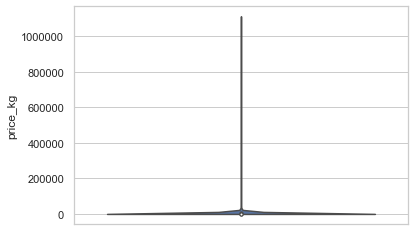

In [124]:
# 분포 확인
dist(df,prd,'price_kg')

In [125]:
# 이상치 확인 및 제거
price1 = 100
price2 = 10000
flag = False
display(df[(df['prd']==prd)&(df['price_kg']<price1)])
display(df[(df['prd']==prd)&(df['price_kg']>price2)])

if flag:
    df.drop(df[(df['prd']==prd)&(df['price_kg']<price1)].index,inplace=True)
    df.drop(df[(df['prd']==prd)&(df['price_kg']>price2)].index,inplace=True)

,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week
92914,강원,영월,무,normal,2019-07-20,2,140.00000,12600,90.00000,2019,7,29
92918,강원,영월,무,normal,2019-07-24,2,120.00000,8600,71.67000,2019,7,30
92950,강원,영월,무,normal,2021-07-23,2,40.00000,2600,65.00000,2021,7,29
92954,강원,영월,무,normal,2021-07-26,2,60.00000,5100,85.00000,2021,7,30
136221,경기,광주,무,normal,2018-10-10,1,12.00000,1100,91.67000,2018,10,41
...,...,...,...,...,...,...,...,...,...,...,...,...
4475961,서울,서울,무,normal,2022-11-29,1,16.00000,1500,93.75000,2022,11,48
4510270,경기,삭제,무,normal,2022-11-24,1,48.00000,4500,93.75000,2022,11,47
4516662,인천,인천,무,normal,2022-11-30,1,10.00000,700,70.00000,2022,11,48
4527970,전북,익산,무,normal,2022-11-24,2,32.00000,2000,62.50000,2022,11,47


,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week
135340,경기,광주,무,normal,2018-07-10,1,6.00000,67000,11166.67000,2018,7,28
135341,경기,광주,무,normal,2018-07-11,1,4.00000,57400,14350.00000,2018,7,28
135359,경기,광주,무,normal,2018-08-06,1,4.00000,44600,11150.00000,2018,8,32
135368,경기,광주,무,normal,2018-08-17,1,8.00000,84900,10612.50000,2018,8,33
135439,경기,광주,무,normal,2018-11-30,1,4.00000,42400,10600.00000,2018,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...
3637553,경기,파주,무,normal,2021-12-24,1,40.00000,44482350,1112058.75000,2021,12,51
3833639,제주,제주,무,normal,2020-05-21,1,940.00000,10321990,10980.84000,2020,5,21
4055279,전북,부안,무,normal,2020-11-27,1,58.00000,43029200,741882.76000,2020,11,48
4143147,제주,제주,무,normal,2022-03-04,1,240.00000,4099500,17081.25000,2022,3,9


In [88]:
# display(df[(df['prd']==prd)&(df['price_kg']>10000)].sort_values('price_kg'))

'information'

count   34039.00000
mean     4117.08231
std      2230.64706
min       100.00000
25%      2350.00000
50%      3600.00000
75%      6000.00000
max     10000.00000
Name: price_kg, dtype: float64

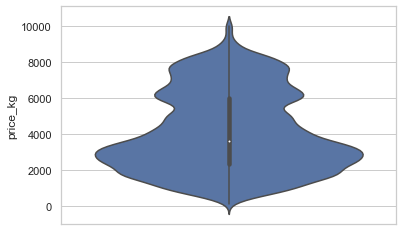

In [119]:
# 분포 재확인
dist(df,prd,'price_kg')

In [120]:
df[df['prd']==prd].describe()

,class,scale,price,price_kg,year,month,week
count,34039.00000,34039.00000,34039.00000,34039.00000,34039.00000,34039.00000,34039.00000
mean,2.41858,47.17095,244498.49875,4117.08231,2020.21179,6.70143,27.34076
std,2.32286,91.71355,597762.09726,2230.64706,1.32580,2.98895,13.02927
min,1.00000,0.20000,500.00000,100.00000,2018.00000,1.00000,1.00000
25%,1.00000,8.00000,19000.00000,2350.00000,2019.00000,5.00000,19.00000
50%,1.00000,20.00000,73000.00000,3600.00000,2020.00000,6.00000,26.00000
75%,3.00000,40.00000,203300.00000,6000.00000,2021.00000,9.00000,38.00000
max,9.00000,1462.00000,10641300.00000,10000.00000,2022.00000,12.00000,53.00000


['AppleGothic']


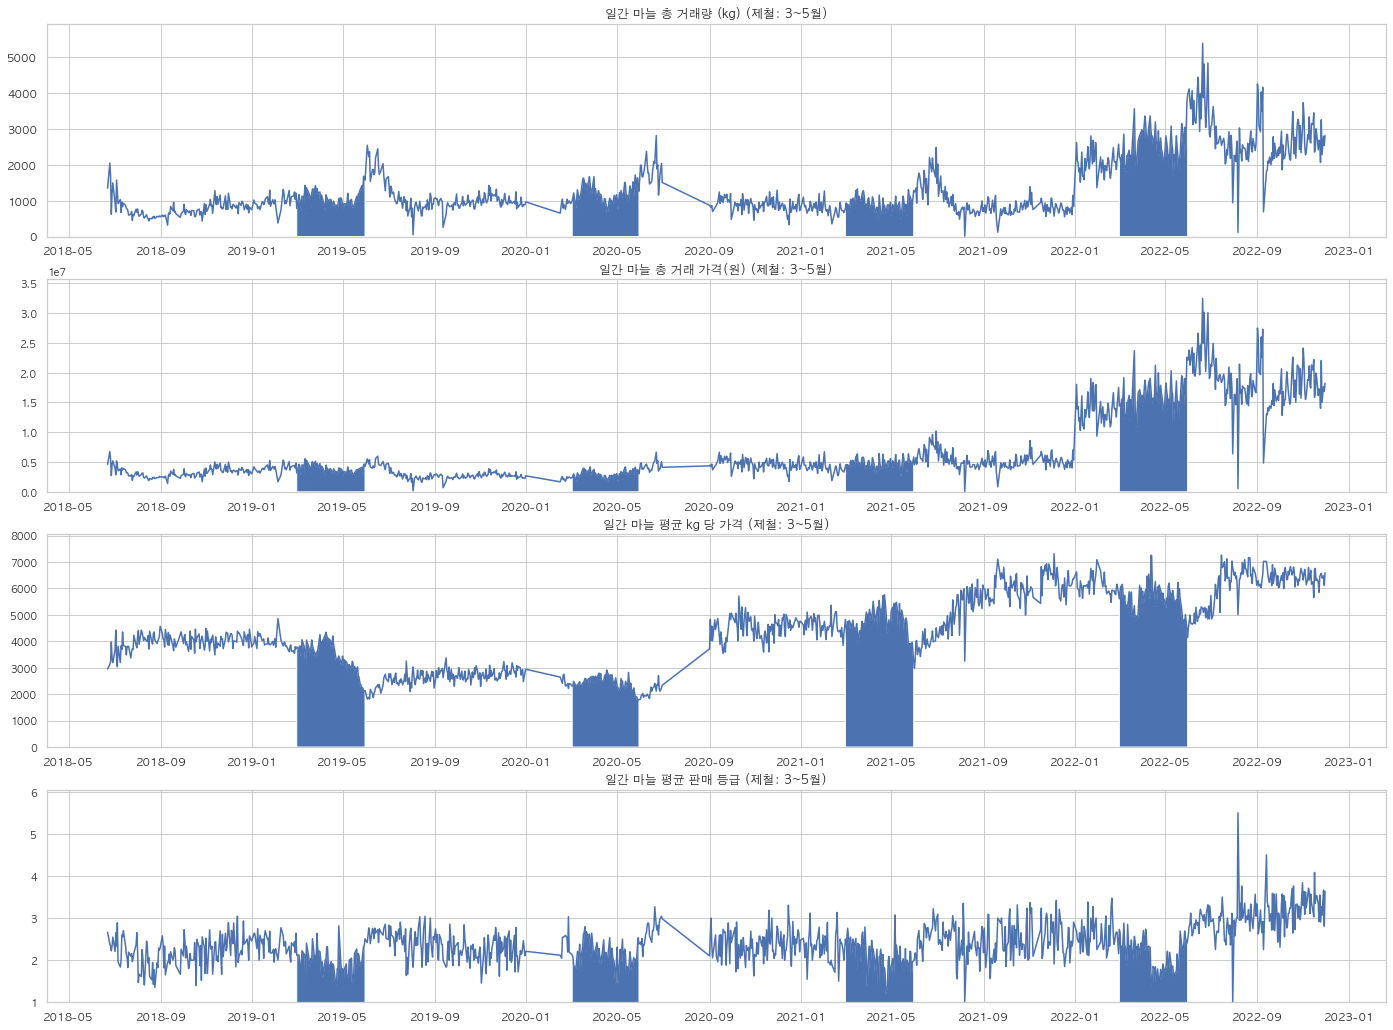

In [122]:
# 전체 분포
prd_info(prd,3,5)

In [18]:
df[df['prd']==prd]

,state,city,prd,scale,price,eco,reg_date,class,price_kg,year,month,week
15917,대구,대구,오이,18.00000,77000,normal,2019-11-22,1,4277.78000,2019,11,47
15918,대구,대구,오이,18.00000,48000,normal,2019-11-22,2,2666.67000,2019,11,47
92218,경기,고양,오이,10.00000,17500,normal,2018-06-22,1,1750.00000,2018,6,25
92219,경기,고양,오이,10.00000,16000,normal,2018-06-25,1,1600.00000,2018,6,26
92220,경기,고양,오이,10.00000,20000,normal,2018-06-27,1,2000.00000,2018,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...
26002810,전남,여수,오이,10.00000,33000,normal,2022-11-30,1,3300.00000,2022,11,48
26002811,전남,여수,오이,10.00000,17500,normal,2022-11-30,2,1750.00000,2022,11,48
26002938,경기,이천,오이,18.00000,30000,normal,2022-03-04,2,1666.67000,2022,3,9
26002939,경기,이천,오이,18.00000,25500,normal,2022-03-04,3,1416.67000,2022,3,9


## 제철 vs 제철 아닐 때

In [57]:

prd = '오이'
month1, month2= 4,7
df_sn = df[(df['prd']==prd)&(df['reg_date'].dt.month>=month1)&(df['reg_date'].dt.month<=month2)]
df_nsn = df[(df['prd']==prd)&((df['reg_date'].dt.month<month1)|(df['reg_date'].dt.month>month2))]

In [58]:
display('제철')
display(df_sn.describe())
display('제철 외')
display(df_nsn.describe())

'제철'

,scale,price,class,price_kg,year,month,week
count,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000
mean,14.40036,18235.33650,1.48793,1285.33640,2020.73974,5.56233,22.29211
std,4.93656,11821.15680,1.14006,729.81003,1.31607,1.10985,4.96209
min,0.30000,500.00000,1.00000,100.00000,2018.00000,4.00000,13.00000
25%,10.00000,10000.00000,1.00000,800.00000,2020.00000,5.00000,18.00000
50%,15.00000,15500.00000,1.00000,1200.00000,2021.00000,6.00000,23.00000
75%,18.00000,24000.00000,2.00000,1600.00000,2022.00000,7.00000,27.00000
max,200.00000,196000.00000,9.00000,10000.00000,2022.00000,7.00000,31.00000


'제철 외'

,scale,price,class,price_kg,year,month,week
count,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000
mean,14.42279,28601.95761,1.54133,1982.38599,2020.40111,7.50569,30.72454
std,4.38493,18237.24296,1.07866,1096.06751,1.42540,3.65291,15.97221
min,0.20000,500.00000,1.00000,100.00000,2018.00000,1.00000,1.00000
25%,10.00000,15000.00000,1.00000,1200.00000,2019.00000,3.00000,12.00000
50%,18.00000,25000.00000,1.00000,1833.33000,2021.00000,9.00000,36.00000
75%,18.00000,38000.00000,2.00000,2600.00000,2022.00000,10.00000,43.00000
max,211.00000,200000.00000,9.00000,10000.00000,2022.00000,12.00000,53.00000


'information'

count   597500.00000
mean      1285.33640
std        729.81003
min        100.00000
25%        800.00000
50%       1200.00000
75%       1600.00000
max      10000.00000
Name: price_kg, dtype: float64

None

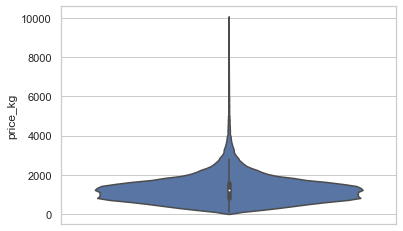

In [66]:
display(dist(df_sn,'오이','price_kg'))

'information'

count   873591.00000
mean      1982.38599
std       1096.06751
min        100.00000
25%       1200.00000
50%       1833.33000
75%       2600.00000
max      10000.00000
Name: price_kg, dtype: float64

None

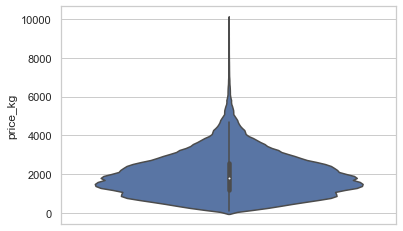

In [67]:
display(dist(df_nsn,'오이','price_kg'))

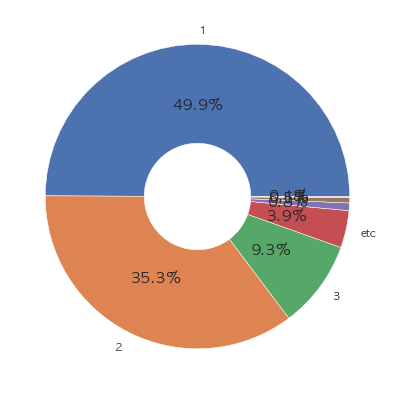

In [68]:
plt.figure(figsize=(7,7),facecolor='white')
plt.rc('font', size=15) 
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
class_lst = list(df[df['prd']=='오이']['class'].value_counts().index)
show = class_lst[:3]
show.append('etc')
for _ in range(len(class_lst)-4):
    show.append('')
plt.pie(df[df['prd']=='오이']['class'].value_counts(),labels=show,autopct='%.1f%%',wedgeprops=wedgeprops)
plt.show()

In [ ]:
df[df['prd']=='오이']

In [72]:
# 기간 정하기
# 기간 내 어느 날 어떤 물건을 사는게 가장 싼 지
# 기간 내 특정 품목 평균 가격 및 싸게 사려면 언제 사야할 지
df[df['prd']=='오이'].groupby(['year','week']).sum()

scale      price  class       price_kg  month
year week                                                     
2018 1     14637.60000   22698400   1733  1743885.38000  12888
     25    17798.60000   15250400   1820  1120384.84000   7728
     26    96300.60000   84143500   9752  6139848.83000  41862
     27    95592.60000  106503750   9309  7607351.01000  48258
     28    84913.00000  138588900   8701  9881997.44000  43204
...                ...        ...    ...            ...    ...
2022 44   124246.34000  174754500  13263 11603012.35000  92899
     45   118293.38000  181792900  12216 12089788.61000  86834
     46   124437.59000  213790700  13369 14197198.59000  93082
     47   131586.62000  223216600  14038 14950666.35000  98758
     48    67116.97000  142117400   7170  9717612.24000  51007

[219 rows x 5 columns]

In [ ]:
# 월, 일 합치기